<a href="https://www.kaggle.com/code/pachecopacheco4/caesar-and-vigenere-ciphers?scriptVersionId=149016730" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This project from here was born in order to introduce myself to Python Language. I hope it does not have too many errors, bear with me :)

# Caesar Cipher
 Project from the book "Introduction to Cryptography with Maple" de José Luis Gómez Pardo.

In [1]:
#Spanish alphabet
abEsp=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','ñ','o','p','q','r','s','t','u','v','w','x','y','z']
abEng=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

#Convert a string to lowercase
#string='Jaime'
#Pardo book example
string='thedieiscast'
#string='zz'
newString=string.lower()


 Here we wrote a function that controls that every character of a string is in a given alphabet. At first developments we tried to do this in order to control that only words are introduced. 

In [2]:

def validString(string,abecedario):
    """ This function basically is if it finds a character that is not in the given alphabet then finish. """
    for i in string.lower():
        if(i not in abecedario):
            print('A non valid character is found: ',i)
            break

#print(validString('234',abEsp))
#print(abEsp.index('z'))

 Function that controls if a letter is uppercase or lowercase. This was introduced to posterior developments. 

In [3]:

def mayOrMin(string,abecedario):
    """ This function saves a 0 if the letter is in uppercase, 1 if it is lowercase."""
    mOrm=[]
    abEspMay=[letra.upper() for letra in abecedario]
    for i in string:
        if(i in abEsp):
                mOrm.append(1)
        elif(i in abEspMay):
            mOrm.append(0)
    return(mOrm)
mom=mayOrMin(string,abEsp)


 Function that associates to every letter from the alphabet its position, from 0 to len(alphabet). Example: position 0 -> a, position 1 -> b, ... 

In [4]:
def strToNum(string,abecedario):
    code=[]
    for i in string.lower():
        code.append(abecedario.index(i))
    return(code)
    
#print(strToNum('Jaime',abEsp))
#e=strToNum(string,abEsp)
e=strToNum(string,abEng)
print('Conversión a código: ',e)

Conversión a código:  [19, 7, 4, 3, 8, 4, 8, 18, 2, 0, 18, 19]


 Function that adds to every position the quantity given by "key".

In [5]:
def despInd(code,key):
    for i in range(0,len(code),1):
        code[i]=code[i]+key
    return(code)

#f=despInd(e,2)
#Libro de Pardo; con abecedario en inglés
f=despInd(e,19)
print("Desplazando posiciones: ",f)
#print(e)
#print(3%1)

Desplazando posiciones:  [38, 26, 23, 22, 27, 23, 27, 37, 21, 19, 37, 38]


 Function modular adjustment. Here we assign to every position its class module len(alphabet)-1. 

In [6]:
def contClasMod(code,mod):
    for i in range(0,len(code),1):
        if(code[i]>(mod-1)):
            code[i]=code[i]%mod
    return(code)

#Yo    
#g=contClasMod(f,len(abEsp))
#Con el abecedario inglés del libro de Pardo
g=contClasMod(f,len(abEng))
print("Tras devolver según el módulo",g)

Tras devolver según el módulo [12, 0, 23, 22, 1, 23, 1, 11, 21, 19, 11, 12]


 Function that returns the codified message. Initially we only ciffer using this method. We include too a possible generalization including uppercase and lowecase.  

In [7]:
#v1 
def codeCaesar(code,abecedario):
    for i in range(0,len(code),1):
        code[i]=abecedario[code[i]]
        print(i,code[i])
        #El .join() hace que se unan todas los caracteres
    #return(code)
    return("".join(code))

#v2 que incluye mayúsculas y minúsculas
#def codeCaesar(code,abecedario,mayOrMin):
    #for i in range(0,len(code),1):
        #if(mayOrMin[i]==0):
            #code[i]=abecedario[code[i]].upper()
        #else:
            #code[i]=abecedario[code[i]].lower()
    #return("".join(code))
#h=codeCaesar(g,abEsp,mom)


**Tests** 

In [8]:
#Codificar mensaje con el ejemplo de Pardo
#Yo
#print(codeCaesar(g,abEsp))
#Con el ejemplo de Pardo
print(codeCaesar(g,abEng))

0 m
1 a
2 x
3 w
4 b
5 x
6 b
7 l
8 v
9 t
10 l
11 m
maxwbxblvtlm


Here we have two possibilities:
* Create a .py module, after import it and use every function defined on it.
* Create a function that includes the functionality but simplified. 

 As an unique function.

In [9]:
def CaesarCipher(key,abecedario,string):
    """ 
        1) Messages must include only letters.
        2) To decipher the message we have to introduce the key with "-" sign. 
        
    """
    for i in string.lower():
        if(i not in abecedario):
            print('Se encontró un caracter no válido:',i,'\nMeter solamente caracteres del abecedario dado.')
            break
    code=[]
    #Pasado a código numérico
    for i in string.lower():
        code.append(abecedario.index(i))
    print('Paso a código numérico: ',code)
    #Suma de la llave a cada posición
    for i in range(0,len(code),1):
        code[i]=code[i]+key
    print('Desplazamiento de posiciones por llave: ',code)
    #Ajuste modular     
    for i in range(0,len(code),1):
        if(code[i]>(len(abecedario)-1)):
            code[i]=code[i]%len(abecedario)
    print('Ajuste modular: ',code)
    #Cifrado        
    for i in range(0,len(code),1):
        code[i]=abecedario[code[i]]
    return("".join(code))

**Tests**

In [10]:
    
abEng=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
string='Thedieiscast'
llave=19
a=CaesarCipher(llave,abEng,string)
print('Tras cifrar: ',a)
b=CaesarCipher(-llave,abEng,a)
print('Tras descifrar: ',b)

Paso a código numérico:  [19, 7, 4, 3, 8, 4, 8, 18, 2, 0, 18, 19]
Desplazamiento de posiciones por llave:  [38, 26, 23, 22, 27, 23, 27, 37, 21, 19, 37, 38]
Ajuste modular:  [12, 0, 23, 22, 1, 23, 1, 11, 21, 19, 11, 12]
Tras cifrar:  maxwbxblvtlm
Paso a código numérico:  [12, 0, 23, 22, 1, 23, 1, 11, 21, 19, 11, 12]
Desplazamiento de posiciones por llave:  [-7, -19, 4, 3, -18, 4, -18, -8, 2, 0, -8, -7]
Ajuste modular:  [-7, -19, 4, 3, -18, 4, -18, -8, 2, 0, -8, -7]
Tras descifrar:  thedieiscast


 Possible improvements:
* Introduce numbers in the messages.
* Introduce commas, dots and spaces. 
* Introduce uppercase letters. 

 Improvement that includes numbers in the message.

In [11]:
#En una única función 
def CaesarCipherV2(key,abecedario,string):
    """ Esta función básicamente es una recreación del libro de Pardo sobre criptografía. En este caso se tratará el cifrado del César.
        1) Solo admite textos con números y letras.
        2) Para descifrar, tan solo tenemos que introducir la key en negativo. 
        
    """
    code=[]
    for i in string.lower():
        if i in abecedario:
            print(i)
            code.append(abecedario[((abecedario.index(i)+key)%len(abecedario))])
        else:
            print(i)
            code.append(i)
    return("".join(code))
    
abEng=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
string='Thedieiscast123;@ a'
llave=19
a=CaesarCipherV2(llave,abEng,string)
print('Tras cifrar: ',a)
b=CaesarCipherV2(-llave,abEng,a)
print('Tras descifrar: ',b)

t
h
e
d
i
e
i
s
c
a
s
t
1
2
3
;
@
 
a
Tras cifrar:  maxwbxblvtlm123;@ t
m
a
x
w
b
x
b
l
v
t
l
m
1
2
3
;
@
 
t
Tras descifrar:  thedieiscast123;@ a


 Improvement that includes uppercases. 

In [12]:
#En una única función 
def CaesarCipherV3(key,abecedario,string):
    """ Esta función básicamente es una recreación del libro de Pardo sobre criptografía. En este caso se tratará el cifrado del César.
        1) Admite texto con números, letras y caracteres especiales.  
        2) Para descifrar, tan solo tenemos que introducir la key en negativo. 
        
    """
    code=[]
    abecedarioMay=[letra.upper() for letra in abecedario]
    for i in string:
        if i in abecedario:
            #print(i)
            code.append(abecedario[((abecedario.index(i)+key)%len(abecedario))])
        elif i in abecedarioMay:
            #print(i)
            code.append(abecedarioMay[((abecedarioMay.index(i)+key)%len(abecedarioMay))].upper())
        else:
            #print(i)
            code.append(i)
    return("".join(code))
    
abEng=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
string='Thedieis CaSt123;@ a'
llave=19
a=CaesarCipherV3(llave,abEng,string)
print('Tras cifrar: ',a)
b=CaesarCipherV3(-llave,abEng,a)
print('Tras descifrar: ',b)

Tras cifrar:  Maxwbxbl VtLm123;@ t
Tras descifrar:  Thedieis CaSt123;@ a


 Decipher knowing that we have applied the Caesar cipher to obtain the message. In order to do that, we only have to introduce the key with a "-" sign.

In [13]:
abEng=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
string='tnlxptdlhtnzybfpcpo'
for i in range(0,len(abEng),1):
    print(['Llave: ',i,'Resultado: ',CaesarCipherV3(-i,abEng,string)])

['Llave: ', 0, 'Resultado: ', 'tnlxptdlhtnzybfpcpo']
['Llave: ', 1, 'Resultado: ', 'smkwosckgsmyxaeobon']
['Llave: ', 2, 'Resultado: ', 'rljvnrbjfrlxwzdnanm']
['Llave: ', 3, 'Resultado: ', 'qkiumqaieqkwvycmzml']
['Llave: ', 4, 'Resultado: ', 'pjhtlpzhdpjvuxblylk']
['Llave: ', 5, 'Resultado: ', 'oigskoygcoiutwakxkj']
['Llave: ', 6, 'Resultado: ', 'nhfrjnxfbnhtsvzjwji']
['Llave: ', 7, 'Resultado: ', 'mgeqimweamgsruyivih']
['Llave: ', 8, 'Resultado: ', 'lfdphlvdzlfrqtxhuhg']
['Llave: ', 9, 'Resultado: ', 'kecogkucykeqpswgtgf']
['Llave: ', 10, 'Resultado: ', 'jdbnfjtbxjdporvfsfe']
['Llave: ', 11, 'Resultado: ', 'icameisawiconquered']
['Llave: ', 12, 'Resultado: ', 'hbzldhrzvhbnmptdqdc']
['Llave: ', 13, 'Resultado: ', 'gaykcgqyugamloscpcb']
['Llave: ', 14, 'Resultado: ', 'fzxjbfpxtfzlknrboba']
['Llave: ', 15, 'Resultado: ', 'eywiaeowseykjmqanaz']
['Llave: ', 16, 'Resultado: ', 'dxvhzdnvrdxjilpzmzy']
['Llave: ', 17, 'Resultado: ', 'cwugycmuqcwihkoylyx']
['Llave: ', 18, 'Resultado: ', 'bvtfxb

 After seeing every possibility we should think that the correct one is: "I came, I saw, I conquered".

In [14]:
string='T nlxp, T dlh, T nzybfpcpo.'
print(CaesarCipherV3(-11,abEng,string))

I came, I saw, I conquered.


 As a final comment, we could have introduced a more interactive way to proceed, introducing manually the key, message and alphabet. 
 
 This could be done easily introducing "inputs".

 **Introducing variability**
 
 A way to introduce variability is simply by obtaining a permutation of the given alphabet. If we would like to reproduce the results we can fix the used seed. 
 
 We can do this inside of the function but we have to pay attention to the fact that we need the permutation in order to undo the cipher. 
 

In [15]:
abEng=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
import random
random.seed(35643419)
abEng2=random.sample(abEng,len(abEng))
print('Used seed: ',random.random())
print('Used alphabet: ',abEng2)
string='Thedieis CaSt123;@ a'
llave=19
a=CaesarCipherV3(llave,abEng2,string)
print('Tras cifrar: ',a)
b=CaesarCipherV3(-llave,abEng2,a)
print('Tras descifrar: ',b)


Used seed:  0.31185773666029737
Used alphabet:  ['u', 'k', 'b', 'a', 'z', 'm', 'v', 'f', 'q', 'd', 'p', 'r', 'y', 'n', 'h', 'e', 's', 'l', 'i', 'x', 'g', 'j', 't', 'w', 'c', 'o']
Tras cifrar:  Efqbrqrd LtDe123;@ t
Tras descifrar:  Thedieis CaSt123;@ a


 **Deciphering messages** 
 
 If we would like to decipher a ciphered message with this method (having in mind that we are using the English language), we must do a *frequencies* analysis. With it, we can replace the most frequent letters by the most frequents in English language. Moreover, we must pay attention to the formed words in order that they have sense. 

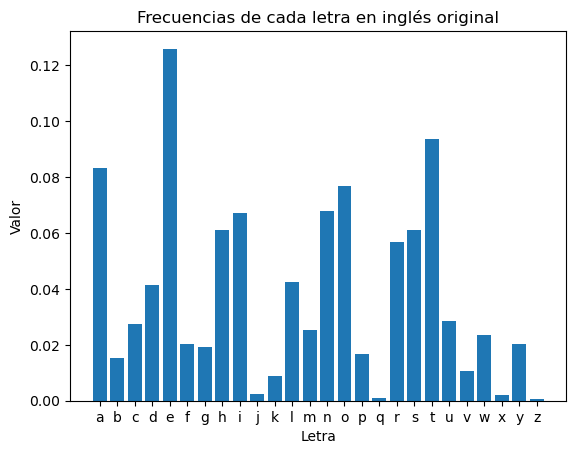

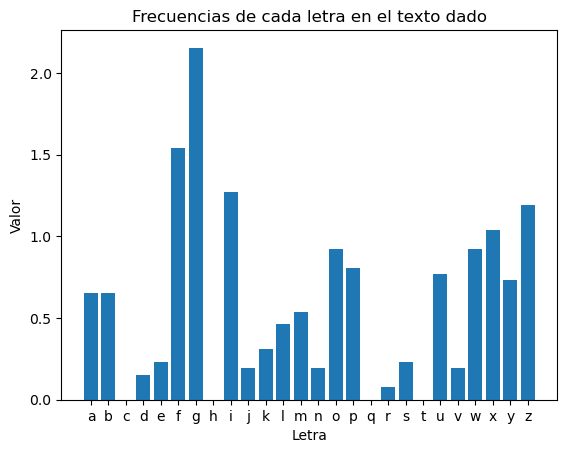

Original:
 z mplao xidg fpao xgw fxg fwlfx,fxif fxg biyg miamlaifzpu sxzmx xio bgwdgo yg kpw ogmzexgwzuj fxg yiulbmwzef xio guinago yg fp agiwu fxg spwo, nlf pu i miewzmg zf bfwlmr yg fp fgaa xgw fxif i jguzg xio wgdgiago zf fp yg. fxzb kiabg ozbmapblwg kgffgwgo yioiyg olwkg fp yg. fxif oiv z ngmiyg fxg yibfgw pk xgw bpla, iuo z inlbgo yv epsgw. gdgwv fzyg z fxzur pk zf, z iy ozbfwgbbgo iuo ibxiygo, iuo z op eguiumg ups zu fxg pnazjifzpu luogw sxzmx z eaimg yvbgak pk fgaazuj fxg fwlfx zu swzfzuj yv ygypzwb.
Deciphered message:
 I COULD HAVE TOLD HER THE TRUTH,THAT THE SAME CALCULATION WHICH HAD SERVED ME FOR DECIPHERING THE MANUSCRIPT HAD ENABLED ME TO LEARN THE WORD, BUT ON A CAPRICE IT STRUCK ME TO TELL HER THAT A GENIE HAD REVEALED IT TO ME. THIS FALSE DISCLOSURE FETTERED MADAME DURFE TO ME. THAT DAY I BECAME THE MASTER OF HER SOUL, AND I ABUSED MY POWER. EVERY TIME I THINK OF IT, I AM DISTRESSED AND ASHAMED, AND I DO PENANCE NOW IN THE OBLIGATION UNDER WHICH I PLACE MYSELF OF TELLI

In [16]:
t1="Z MPLAO XIDG FPAO XGW FXG FWLFX,FXIF FXG BIYG MIAMLAIFZPU SXZMX XIO BGWDGO YG KPW OGMZEXGWZUJ FXG YIULBMWZEF XIO GUINAGO YG FP AGIWU FXG SPWO, NLF PU I MIEWZMG ZF BFWLMR YG FP FGAA XGW FXIF I JGUZG XIO WGDGIAGO ZF FP YG. FXZB KIABG OZBMAPBLWG KGFFGWGO YIOIYG OLWKG FP YG. FXIF OIV Z NGMIYG FXG YIBFGW PK XGW BPLA, IUO Z INLBGO YV EPSGW. GDGWV FZYG Z FXZUR PK ZF, Z IY OZBFWGBBGO IUO IBXIYGO, IUO Z OP EGUIUMG UPS ZU FXG PNAZJIFZPU LUOGW SXZMX Z EAIMG YVBGAK PK FGAAZUJ FXG FWLFX ZU SWZFZUJ YV YGYPZWB."

freq=[t1.lower().count(i)/len(abEng) for i in abEng]
#print(freq)

import matplotlib.pyplot as plt


freqOrIng=[8.34,1.54,2.73,4.14,12.60,2.03,1.92,6.11,6.71,0.23,0.87,4.24,2.53,6.80,7.70,1.66,0.09,5.68,6.11,9.37,2.85,1.06,2.34,0.20,2.04,0.06]
freqOrIng=[fr*0.01 for fr in freqOrIng]

plt.bar(abEng, freqOrIng)
plt.xlabel('Letra')
plt.ylabel('Valor')
plt.title('Frecuencias de cada letra en inglés original')
plt.show()

plt.bar(abEng, freq)
plt.xlabel('Letra')
plt.ylabel('Valor')
plt.title('Frecuencias de cada letra en el texto dado')
plt.show()


#Aproximación heurística
string3 = ""

for i in t1.lower():
    if i == 'g':
        #Fija
        string3 += 'E'
    elif i == 'f':
        #Fija
        string3 += 'T'
    elif i == 'i':
        #Fija
        string3 += 'A'
    elif i == 'x':
        #Por coherencia semántica (para formar la palabra "the")
        string3 += 'H'
    elif i == 'd':
        #Por coherencia semántica (para formar la palabra "have")
        string3 += 'V'
    elif i == 'w':
        #Por coherencia semántica (para formar la palabra "truth")
        string3 += 'R'
    elif i == 'l':
        #Por coherencia semántica (para formar la palabra "truth")
        string3 += 'U'
    elif i == 'o':
        #Por coherencia semántica (para formar la palabra "had")
        string3 += 'D'
    elif i == 'b':
        string3 += 'S'
    elif i == 'y':
        #Por coherencia semántica (para formar la palabra "me", "same")
        string3 += 'M'
    elif i == 'p':
        #Por coherencia semántica (para formar la palabra "to")
        string3 += 'O'
    elif i == 'a':
        #Por coherencia semántica (para formar la palabra "told")
        string3 += 'L'
    elif i == 'm':
        string3 += 'C'
    elif i == 'z':
        #Por coherencia semántica (para formar la palabra "i")
        string3 += 'I'
    elif i == 'u':
        #Por coherencia semántica (para formar la palabra "calculation")
        string3 += 'N'
    elif i == 's':
        #Por coherencia semántica (para formar la palabra "which")
        string3 += 'W' 
    elif i == 'e':
        #Por coherencia semántica (para formar la palabra "manuscript")
        string3 += 'P'
    elif i == 'n':
        #Por coherencia semántica (para formar la palabra "enabled")
        string3 += 'B'
    elif i == 'j':
        #Por coherencia semántica (para formar la palabra "genie")
        string3 += 'G'
    elif i == 'v':
        #Por coherencia semántica (para formar la palabra "myself")
        string3 += 'Y'
    elif i == 'k':
        #Por coherencia semántica (para formar la palabra "myself")
        string3 += 'F'
    elif i == 'r':
        string3 += 'K'
    else:
        string3 += i
        
print('Original:\n',t1.lower())        
print('Deciphered message:\n',string3)       

# ------------------------------------------------------------------------------------------

# Vigenere Cipher

In [17]:
import math
def ampWord(word1,word2):
    """ This function basically returns a word that is constructed to given words. For example: word1='vigenere' and word2='word'. The result of this function is 
    'wordword'. We construct a new word by simply concatenating the letters of word2 enough times to complete the length of the word1. """
    if len(word1)==len(word2):
        new=word2
    elif len(word1)>len(word2):
        new=word2*math.ceil(len(word1)/len(word2))
        new=new[0:len(word1)]
    else:
        new=word2[0:len(word1)]
    return(new)

a='vigenereexample'
b='word'

key=ampWord(a,b)
print('Original word:',a)
print('Word used as a key:',b)
print('Result of the function:',key)

Original word: vigenereexample
Word used as a key: word
Result of the function: wordwordwordwor


Here we decided to introduce inside of the VigenereCipher the commented function. 

In [18]:
def VigenereCipher(key,abecedario,string):
    #Creación de la llave correspondiente
    #------------------------------------
    if len(string)==len(key):
        key=string
    elif len(string)>len(key):
        key=key*math.ceil(len(string)/len(key))
        key=key[0:len(string)]
    else:
        key=key[0:len(string)]
    #------------------------------------
    
    code1=[]
    code2=[]
    for i in string:
            code1.append(abecedario.index(i))
    for j in key:
            code2.append(abecedario.index(j))
    code=[]
    for k in range(0,len(code1),1):
        code.append(abecedario[(code1[k]+code2[k])%len(abecedario)])     
    return("".join(code))

abEng=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
key='word'
string='vigenereexample'
print('Used key:',key)
print('Original word:',string)
print('Routine result:',VigenereCipher(key,abEng,string))

Used key: word
Original word: vigenereexample
Routine result: rwxhjsihalrplzv


* It could be interesting add new implementation that includes both uppercases and special characters. 
* Also think about how decipher a message. 